# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**План работ:**

**1. Открываем файл с данными и изучаем общую информацию.**

**2. Выполняем предобработку данных.**

 - Найдем и изучим пропущенные значения в столбцах

 - Рассмотрим типы данных в каждом столбце

 - Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты

**3. Добавляем в таблицу новые столбцы со следующими параметрами:**

 - цена одного квадратного метра

 - день недели публикации объявления

 - месяц публикации объявления

 - год публикации объявления

 - тип этажа квартиры

 - расстояние до центра города в километрах

**4. Проводим исследовательский анализ данных:**

- Исследуем значения в таблице и построим отдельные гистограммы

- Изучим как быстро продавались квартиры

- Определим факторы, которые больше всего влияют на общую стоимость объекта

- Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

- Вычислим среднюю стоимость недвижимости на разном удалении от центра

**5. Подведем итоги и напишем общий вывод.**

### Откройте файл с данными и изучите общую информацию

In [1]:
#Импортируем библиотеки:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Считываем и распаковываем датафрейм:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)

In [3]:
#Выводим первые 20 строк датафрейма:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
#Получаем общую информацию о датафрейме:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

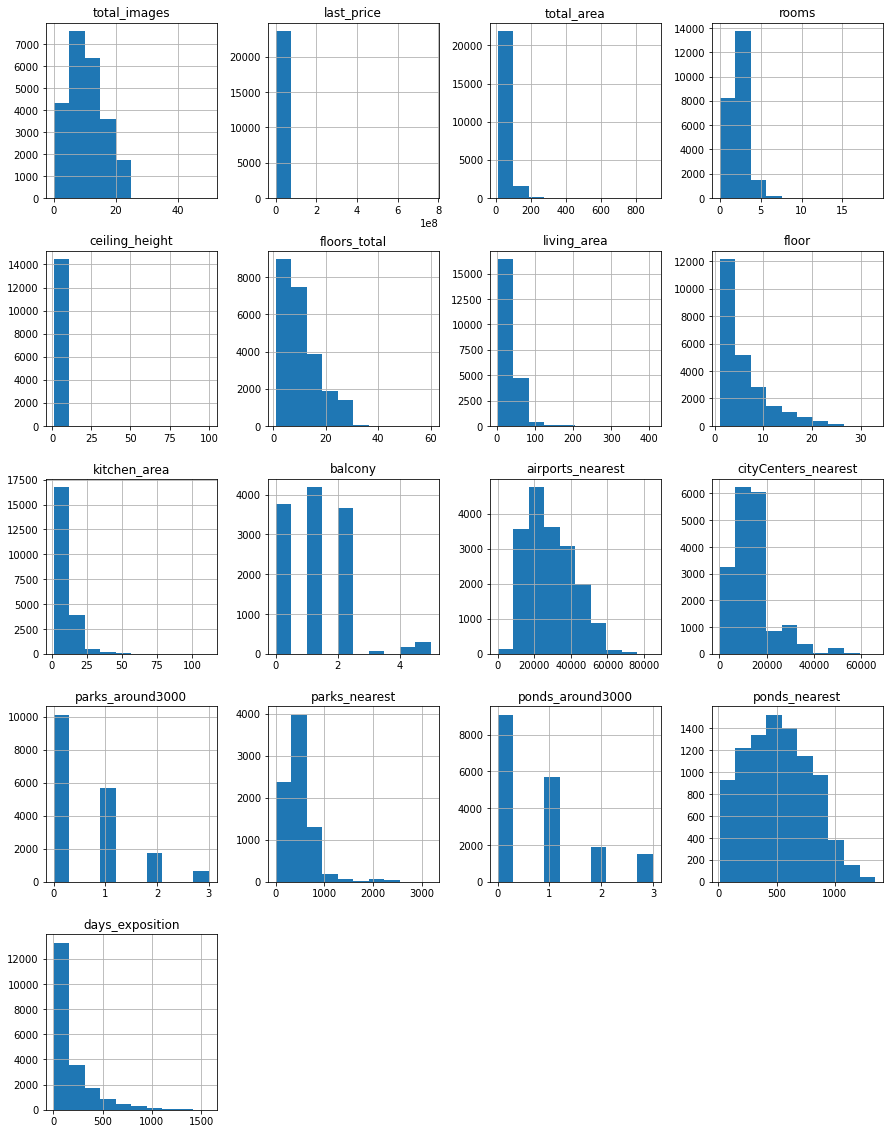

In [5]:
#Построение гистограмм для всех числовых значений:
data.hist(figsize=(15, 20))
plt.show()

**Вывод: Проведя первичную проверку данных, сделав их визуализацию в виде гистограмм, можно заметить, что данные имеют выбросы. Данные выбросы необходимо обработать.**

### Выполните предобработку данных

#### Определяем количество пропусков и избавляемся от них, если это возможно

In [6]:
#Определим в каких стобцах имеются пропуски и их количество:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
#Изменим назваеме столбца cityCenters_nearest на city_сenters_nearest:
data.rename(columns={'cityCenters_nearest':'city_сenters_nearest'}, inplace = True)

In [8]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

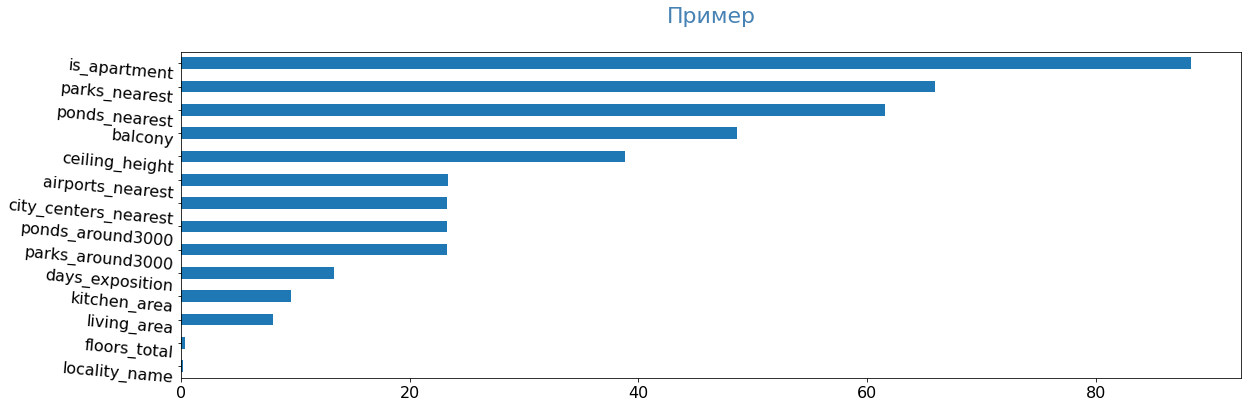

In [9]:
pass_value_barh(data)

In [10]:
#В помещениях, где не указаны болконы, скорей всего их нет. Заменим 11519 пропусков в данных знаечнием 0:
data['balcony'] = data['balcony'].fillna(0)

In [11]:
#В столбце ceiling_height имеется 9195 пропусков, заменим их медианным значением:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [12]:
#В данных столбца ceiling_height имеется жилье с высотой потолков более 10 м.,что заставляет насторожится:
data['ceiling_height'].sort_values(ascending=False).head(40)

22869    100.0
3148      32.0
22336     32.0
21377     27.5
4876      27.0
17857     27.0
5246      27.0
20478     27.0
22938     27.0
5807      27.0
21824     27.0
10773     27.0
5669      26.0
18545     25.0
4643      25.0
9379      25.0
11285     25.0
14382     25.0
355       25.0
6246      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
3474       8.0
15743      8.0
17442      8.0
20264      6.0
21227      5.8
1388       5.6
7578       5.5
12628      5.3
1026       5.3
464        5.2
1053       5.0
21923      4.9
2802       4.8
1300       4.7
Name: ceiling_height, dtype: float64

In [13]:
#Скорей всего ошибка в расположении знака. В помещениях с высотой потолков более 10 м. уменьшим количество десятков:
data.loc[data['ceiling_height']>10, 'ceiling_height'] = data['ceiling_height']/10

In [14]:
#Значения столбца floors_total заменим на медианные:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

In [15]:
#Сделаем проверку, в данных таблицы не должно быть строк, где номер этажа будет больше этажности здания:
data['floors_total'] < data['floor']

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Length: 23699, dtype: bool

In [16]:
#Посчитаем количество подходящих значений
(data['floors_total'] < data['floor']).count()

23699

In [17]:
# check
(data['floors_total'] < data['floor']).sum()

37

In [18]:
#Очень большое количество пропусков имеет столбец is_apartment. Значения стобца - булевые переменные.
#Сделаем срез по значения True и попытаемся найти какую-нибудь закономерность:
data.query('is_apartment == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11,12790000.0,56.60,2018-11-06T00:00:00,2,3.50,3.0,29.400000,1,True,False,False,NaN,0.0,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
916,11,8183000.0,70.00,2018-01-11T00:00:00,2,3.12,3.0,40.000000,3,True,False,False,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0
1109,1,34878556.0,95.80,2014-12-09T00:00:00,2,2.65,6.0,58.300000,5,True,False,False,20.00,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
1608,12,2150000.0,20.10,2019-01-30T00:00:00,1,2.65,9.0,NaN,1,True,False,False,NaN,0.0,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2759,11,7500000.0,152.00,2018-07-27T00:00:00,3,3.00,3.0,NaN,1,True,False,False,NaN,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2975,9,4931398.0,42.90,2018-07-23T00:00:00,1,3.15,4.0,20.390000,3,True,False,False,10.29,0.0,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,273.0
3067,13,6600000.0,95.00,2018-09-08T00:00:00,2,4.50,7.0,45.000000,7,True,False,False,25.00,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.0
3816,4,4779000.0,53.10,2016-05-16T00:00:00,1,2.65,13.0,19.800000,6,True,False,False,15.90,2.0,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0
3951,10,4300000.0,50.00,2019-04-20T00:00:00,1,3.00,11.0,17.000000,9,True,False,False,12.00,2.0,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN
4339,19,6900000.0,72.00,2019-03-25T00:00:00,3,3.50,4.0,70.000000,1,True,False,False,NaN,0.0,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0


In [19]:
#Какие-то конкретные взаимосвязи в таблице не прослеживаются.
#Скорей всего, количество апартаментов очень мало в выборке, как и студий:
data['is_apartment'].mean().round(2)

0.02

In [20]:
#Всего 2% от общей выборки составляют апартаменты. Все пропущенные значения можно заменить на False:
data['is_apartment'] = data['is_apartment'].fillna(False)
#Значение False обернем в bool(), чтобы False воспринималась как булева переменная, а не как строка.

In [21]:
#Размеры кухонной зоны почти никак не коррелируют (взаимосвязаны) с другими значениями в таблице.
#Наибольшие показатели взаимосвязи с общей площадью помещения и ценой, что логично:
data.corr().sort_values('kitchen_area', ascending=False)['kitchen_area']
#Оставим данные значения без изменения.

kitchen_area            1.000000
total_area              0.609121
last_price              0.519869
living_area             0.428674
ceiling_height          0.314942
rooms                   0.269945
floors_total            0.163521
ponds_around3000        0.150148
floor                   0.135531
total_images            0.104756
days_exposition         0.100586
parks_around3000        0.087503
is_apartment            0.049034
balcony                 0.045271
parks_nearest           0.029641
airports_nearest        0.008200
ponds_nearest          -0.105223
city_сenters_nearest   -0.190049
studio                       NaN
open_plan                    NaN
Name: kitchen_area, dtype: float64

In [22]:
#Так же в таблице имееются столбцы parks_around3000 и ponds_around3000.
#Пропущенные значение - отсутсвие парков и водоемов в радиусе 3 км. Заменим данные знаечния на нули:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [23]:
#Заменим пустые значение в столбце locality_name на "неизвестно"
data['locality_name'] = data['locality_name'].fillna('неизвестно')

In [24]:
#Отсекаем объявления, которые весели более двух лет:
#data = data.query('days_exposition < 366*2 or days_exposition != days_exposition')
#data["days_exposition"] = data["days_exposition"].fillna(-1)

data=data.loc[(data["days_exposition"] < 366*2) | (data["days_exposition"].isna())]
#data.sort_values(by = "days_exposition", ascending = False)

**Причины, которые могли привести к пропускам в данных:** 
Человеческий фактор. Отсутсвие полей с обязательным вводом. Экспорт/Импорт данныхм в различное ПО, что в последсвии добавляет пропусков.

In [25]:
data["days_exposition"].isna().sum()

3181

<div style>
<font size="4"><b></b></font>
<font size="5", color = "black">
🤝

#### Просмотрим типы данных в столбцах

In [26]:
#Для удобства выведем обновленный датафрейм и информацию о нем:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22952 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22952 non-null  int64  
 1   last_price            22952 non-null  float64
 2   total_area            22952 non-null  float64
 3   first_day_exposition  22952 non-null  object 
 4   rooms                 22952 non-null  int64  
 5   ceiling_height        22952 non-null  float64
 6   floors_total          22952 non-null  float64
 7   living_area           21097 non-null  float64
 8   floor                 22952 non-null  int64  
 9   is_apartment          22952 non-null  bool   
 10  studio                22952 non-null  bool   
 11  open_plan             22952 non-null  bool   
 12  kitchen_area          20727 non-null  float64
 13  balcony               22952 non-null  float64
 14  locality_name         22952 non-null  object 
 15  airports_nearest   

In [28]:
#Округлим значение в столбце total_area до 1 знака после запятой:
data['total_area'] = data['total_area'].round(1)

In [29]:
#Значение стоблца first_day_exposition приведем к удобному для восприятия формату:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [30]:
#С помощью цикла for заменим типы в столбцах 'last_price', 'floors_total', 'balcony', 'parks_around3000' на int:
for col in ['last_price', 'floors_total', 'balcony', 'parks_around3000']:
    data[col] = data[col].astype(int)

In [31]:
#Приведем к нижнему регистру столбец locality_name:
data['locality_name'] = data['locality_name'].str.lower()

**Тип данных необходимо изменять для удобства восприятия информации, а так же её использования в последующих операциях**

#### Изучение уникальных значений и устанение дубликатов

In [32]:
#Определим количество явных дубликатов в датафрейме:
data.duplicated().sum()
#Повторяющихся строк нет.

0

In [33]:
#Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты:
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [34]:
#Заменяем неявные дубликаты:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок ', 'городской поселок ', 'городской ', 'городского типа ', 'село ', 'деревня ', 
              'садовое товарищество ', 'садоводческое некоммерческое товарищество ', 'станции ', 'пансионат ',
              'при железнодорожной ', 'платформа ', 'коттеджный '], '', regex=True)
)

In [35]:
#Теперь мы избавились от неявных дубликатов:
data['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'новый свет', 'сланцы',
       'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна', 'бокситогорск',

In [36]:
#Повтроный поиск явных дубликатов:
data.duplicated().sum()

0

#### check name

In [37]:
# check
data.locality_name.nunique()

305

In [38]:
#'total_area', 'floor', 'floors_total', 'city_сenters_nearest', 'locality_name', 'rooms'

In [39]:
#Проведем поиск повторяющихся строк по определенным подмножествам:
duplicate_rows = data[data.duplicated(['total_area', 'city_сenters_nearest', 'locality_name', 'rooms', 'floor'])]
#Для столбцов 'total_area', 'city_сenters_nearest', 'locality_name', 'rooms', 'floor' таких дубликатов 384 строки:
duplicate_rows

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1376,6,2500000,42.0,2019-03-06,2,2.65,5,29.0,3,False,False,False,6.0,1,выборг,NaN,NaN,0,NaN,0.0,NaN,NaN
1515,6,2500000,46.0,2017-04-18,2,2.65,6,30.0,6,False,False,False,5.0,0,выборг,NaN,NaN,0,NaN,0.0,NaN,156.0
2395,9,1750000,44.0,2016-06-09,1,2.65,5,18.0,1,False,False,False,14.0,0,кириши,NaN,NaN,0,NaN,0.0,NaN,22.0
2407,11,2450000,44.0,2017-01-17,2,2.65,5,30.0,4,False,False,False,6.3,0,гатчина,NaN,NaN,0,NaN,0.0,NaN,147.0
3568,17,4950000,58.0,2018-02-20,3,2.65,9,39.2,4,False,False,False,6.5,0,санкт-петербург,31691.0,12580.0,0,NaN,0.0,NaN,264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23548,14,2250000,36.0,2017-10-14,1,2.50,5,17.0,5,False,False,False,9.0,0,выборг,NaN,NaN,0,NaN,0.0,NaN,425.0
23593,14,3399000,35.0,2017-12-10,1,2.70,18,17.0,7,False,False,False,10.0,2,кудрово,NaN,NaN,0,NaN,0.0,NaN,123.0
23630,11,3790000,37.0,2017-02-20,1,2.75,18,18.8,7,False,False,False,10.3,2,кудрово,NaN,NaN,0,NaN,0.0,NaN,69.0
23643,1,660000,45.0,2019-02-19,2,2.65,5,31.0,4,False,False,False,6.0,1,сланцы,NaN,NaN,0,NaN,0.0,NaN,NaN


**Вывод: Первичная предобработка данных завершена.**

**Избавились от пропусков:**

Как видно из данных, мы избавились от большенства пропусков. Некоторые пропуски в данных было решено оставить без изменения. Какие-то пропуски были заменены медиаными значениями. Другие были исключены и заменены на "0", в случаях где это возможно было сделать. 

In [40]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1855
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2225
balcony                     0
locality_name               0
airports_nearest         5384
city_сenters_nearest     5363
parks_around3000            0
parks_nearest           15171
ponds_around3000            0
ponds_nearest           14192
days_exposition          3181
dtype: int64

**Отредактировали значения и типы данных в датафрейме:**

Для удобвства восприятия информации и работы с ней были отредактированные определенные столбцы датафрейма. 
Информация стала лучше структурирована. Добавился тим данных datetime64. В определенных столбцах были округлены значения. 

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22952 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22952 non-null  int64         
 1   last_price            22952 non-null  int64         
 2   total_area            22952 non-null  float64       
 3   first_day_exposition  22952 non-null  datetime64[ns]
 4   rooms                 22952 non-null  int64         
 5   ceiling_height        22952 non-null  float64       
 6   floors_total          22952 non-null  int64         
 7   living_area           21097 non-null  float64       
 8   floor                 22952 non-null  int64         
 9   is_apartment          22952 non-null  bool          
 10  studio                22952 non-null  bool          
 11  open_plan             22952 non-null  bool          
 12  kitchen_area          20727 non-null  float64       
 13  balcony         

**Проверили данные на наличие дубликатов явных и неявных.**

**Вывод: В данных по результатам работы не были найдены явные дубликаты в строках датафрейма. Зато были найдены неявные в столбце locality_name. Данный столбец имел строковый тип данных. Приведя его к нижнему регистру и заменняя повторяющиеся значения на одинаковые, мы избавились от неявных дубликатов. Теперь данные готовы к работе.**

### Добавьте в таблицу новые столбцы

**Цена за квадрантый метр:**

In [42]:
#Создаем новый столбец square_price (цена в рублях за один квадратный метр):
data['square_price'] = data['last_price']/data['total_area']

In [43]:
#Округляем значение этого столбца до 2х знаков после запятой:
data['square_price'] = data['square_price'].round(2)
data['square_price'].unique()

array([120370.37,  82920.79,  92785.71, ...,  44091.71, 149414.06,
        41795.67])

**Данные дня публикации:**

In [44]:
#Создадим столбец day_of_publication в который занесем данные дня публикации объявления:
data['day_of_publication'] = data['first_day_exposition'].dt.weekday

In [45]:
#Значения 0,1,2 ... - cоответсвуют: понедельник, вторник ... 
data['day_of_publication'].unique()

array([3, 1, 4, 0, 2, 6, 5])

**Данные месяца публикации:**

In [46]:
#Создадим столбец month_of_publication в который занесем данные месяца публикации объявления:
data['month_of_publication'] = data['first_day_exposition'].dt.month

In [47]:
#Значения 1,2,3 ... - cоответсвуют: январь, февраль ...
data['month_of_publication'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

**Данные года публикации:**

In [48]:
#Создадим столбец year_of_publication в который занесем данные года публикации объявления:
data['year_of_publication'] = data['first_day_exposition'].dt.year

In [49]:
#Года публикации объявлений о продаже недвижимости:
data['year_of_publication'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

**Информация о типе этажа квартиры:**

In [50]:
data['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18, 22,
        4,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

In [51]:
#Напишем функцию для определения этажа:
def floor_check(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] <= 0:
        return 'паркинг'
    return 'другой'

In [52]:
#С помощью метода apply применим функцию в датафрейму и сохраним значение в новый столбец type_floor:
data['type_floor'] = data.apply(floor_check, axis=1)

In [53]:
#Уникальные значения столбца type_floor:
data['type_floor'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

**Расстояние до центра города в км:**

In [54]:
data['distance_km'] = (data['city_сenters_nearest']/1000).round(0)

In [55]:
data['distance_km'].unique()

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 21., 49., 35., 27., 36., 34., 29., 26., 53., 22., 55.,
       20., 23.,  1., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 39., 42., 65., 54., 59., 45., 61., 63.])

**Вывод. На данном этапе мы добавили вспомогательные данные к нашей таблице. Теперь наш датафрейм имеет такие данные как: "цена за квадратный метр", "информация о дне публикации", "информация о месяце публикации", "информация о годе публикации", "тип этажа", "расстояние до центра в км".**

### Проведите исследовательский анализ данных

#### **Изучение основных параметров**

##### **Общая площадь недвижимости:**

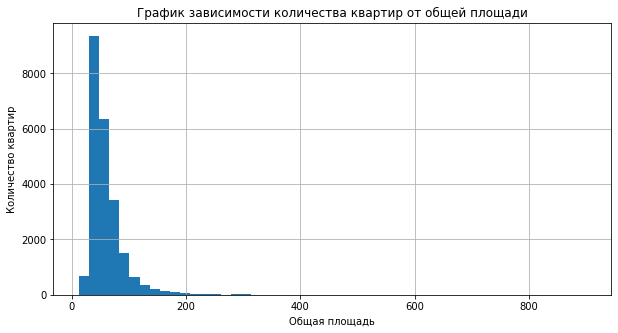

In [56]:
#Построим гистограмму по столбцу total_area:
plt.figure(figsize=(10,5))
data['total_area'].hist(bins=50, grid=True)
plt.xlabel('Общая площадь')
plt.ylabel('Количество квартир')
plt.title('График зависимости количества квартир от общей площади')
plt.show()

Из гистограммы видно, что основная концентрация выборки сосредоточена в интервале значений от 40 до 70 квадратным метров. Но имеются и выбросы. Проработаем данные, чтобы вывести более наглядную гистограмму:

In [57]:
#Посмотрим общую информацию о столбце total_area:
data['total_area'].describe()

count    22952.000000
mean        59.933980
std         35.155556
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

В данных можно увидеть, что есть аномальные значения: квартиры с площадью в 900 квадратных метров. Отсортируем значения по возрастанию:

In [58]:
#Выведем последние 30 элементов отсортированного столбца:
data['total_area'].sort_values().tail(30)

20314    374.0
14498    374.6
5042     380.0
8822     398.0
1388     399.0
12971    400.0
15151    400.0
5873     400.0
14706    401.0
14088    402.0
13749    410.0
14991    413.5
22131    422.2
21955    431.0
3676     442.0
20273    460.8
6221     470.3
660      483.9
6621     488.0
22494    491.0
9826     494.1
12401    495.0
5893     500.0
15016    500.0
4237     517.0
5358     590.0
15651    618.0
3117     631.0
12859    631.2
19540    900.0
Name: total_area, dtype: float64

In [59]:
#Количество квартир в выборке, которые больше 150 кв.м составляет 564 шт.
data.query('total_area > 150')['total_area'].count()

526

In [60]:
#Опредилим процент больших квартир от общего числа:
(data.query('total_area > 150')['total_area'].count() / data['total_area'].count()).round(3) * 100

2.3

Квартиры размером более 150 кв.м. составляют всего 2,4% от общей выборки

In [61]:
data['total_area'].describe()

count    22952.000000
mean        59.933980
std         35.155556
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

In [62]:
data['total_area'].quantile(0.99)

192.04900000000015

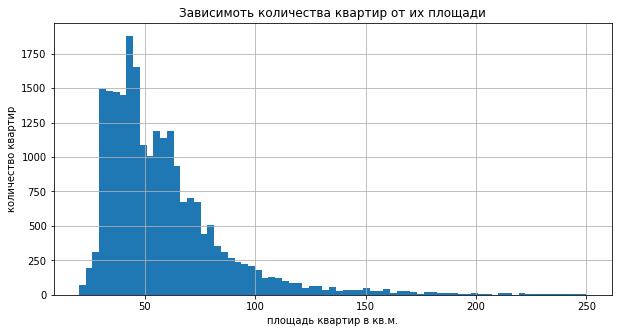

In [63]:
#Построим гистограмму без учета выбросов больших значений (площадь менее 150 кв.м.):
data = data.query('20 < total_area < 250 or total_area != total_area')
plt.figure(figsize=(10,5))
plt.hist(data['total_area'], bins=75)
plt.xlabel('площадь квартир в кв.м.')
plt.ylabel('количество квартир')
plt.title('Зависимоть количества квартир от их площади')

plt.grid()

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22811 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22811 non-null  int64         
 1   last_price            22811 non-null  int64         
 2   total_area            22811 non-null  float64       
 3   first_day_exposition  22811 non-null  datetime64[ns]
 4   rooms                 22811 non-null  int64         
 5   ceiling_height        22811 non-null  float64       
 6   floors_total          22811 non-null  int64         
 7   living_area           20983 non-null  float64       
 8   floor                 22811 non-null  int64         
 9   is_apartment          22811 non-null  bool          
 10  studio                22811 non-null  bool          
 11  open_plan             22811 non-null  bool          
 12  kitchen_area          20628 non-null  float64       
 13  balcony         

Гистограмма имееет несколько пиковых значений. Наибольшая часть объявлений на рынке это квартиры с площадью порядка  45 кв.м. Второй фаворит по количеству объявлений это квартиры с площадью порядка 30-35 кв.м.

##### **Жилая площадь:**

In [65]:
#Рассмотрим значения в столбце living_area:
data['living_area'].describe()

count    20983.000000
mean        33.560563
std         18.624965
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        220.000000
Name: living_area, dtype: float64

In [66]:
data['living_area'].quantile(0.9975)

145.0

In [67]:
data['living_area'].quantile(0.01)

13.0

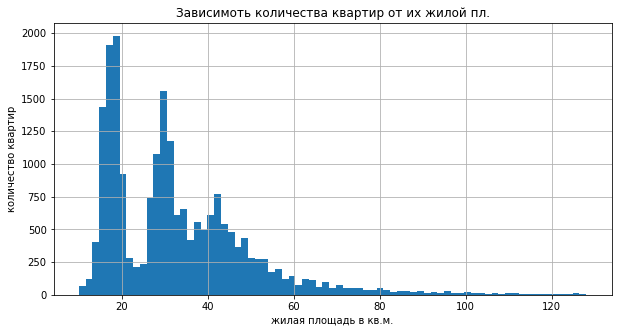

In [68]:
plt.figure(figsize=(10,5))
data = data.query('10 < living_area < 130 or living_area != living_area')
plt.hist(data['living_area'], bins=75) 
plt.xlabel('жилая площадь в кв.м.') 
plt.ylabel('количество квартир') 
plt.title('Зависимоть количества квартир от их жилой пл.') 
plt.grid()

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22672 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22672 non-null  int64         
 1   last_price            22672 non-null  int64         
 2   total_area            22672 non-null  float64       
 3   first_day_exposition  22672 non-null  datetime64[ns]
 4   rooms                 22672 non-null  int64         
 5   ceiling_height        22672 non-null  float64       
 6   floors_total          22672 non-null  int64         
 7   living_area           20844 non-null  float64       
 8   floor                 22672 non-null  int64         
 9   is_apartment          22672 non-null  bool          
 10  studio                22672 non-null  bool          
 11  open_plan             22672 non-null  bool          
 12  kitchen_area          20505 non-null  float64       
 13  balcony         

Первый пик это квартиры с жилой площадью от 15-20 кв.м. - самые популярные объявления. Второй пик приходится на квартиры с жилой площадью 30-35 кв.м.

##### **Площадь кухни:**

In [70]:
#Рассмотри общую информацию о столбце kitchen_area:
data['kitchen_area'].describe()

count    20505.000000
mean        10.353030
std          5.418479
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max        107.000000
Name: kitchen_area, dtype: float64

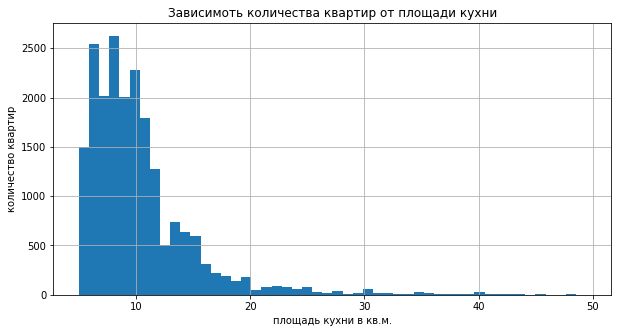

In [71]:
#Минимальные значения соответвуют 0, это связано с тем, что мы заменили нулями значения Nan, 
#потому что кухни могут быть связаны с жилой зоной.
#Построим гистограмму в интервале значений от первого квартиля до третьего:
data = data.query('5 <= kitchen_area < 50 or kitchen_area != kitchen_area')
plt.figure(figsize=(10,5))
plt.hist(data['kitchen_area'], bins=50)
plt.xlabel('площадь кухни в кв.м.')
plt.ylabel('количество квартир')
plt.title('Зависимоть количества квартир от площади кухни')
plt.grid()

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22535 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22535 non-null  int64         
 1   last_price            22535 non-null  int64         
 2   total_area            22535 non-null  float64       
 3   first_day_exposition  22535 non-null  datetime64[ns]
 4   rooms                 22535 non-null  int64         
 5   ceiling_height        22535 non-null  float64       
 6   floors_total          22535 non-null  int64         
 7   living_area           20709 non-null  float64       
 8   floor                 22535 non-null  int64         
 9   is_apartment          22535 non-null  bool          
 10  studio                22535 non-null  bool          
 11  open_plan             22535 non-null  bool          
 12  kitchen_area          20368 non-null  float64       
 13  balcony         

По основным пикам это кухни площадью 6,7,8,9,10 кв.м. Причем значения, близкие к целому числу. Скорей всего это связано с округлением значений при выгрузке данных, либо округление при выборе чекбокса.

##### **Цена объекта:**

In [73]:
#Посмотрим на зависимоть количества квартир от цен:
data['last_price'].describe()

count    2.253500e+04
mean     5.963805e+06
std      6.038041e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [74]:
data['last_price'].quantile(0.99)

27000000.0

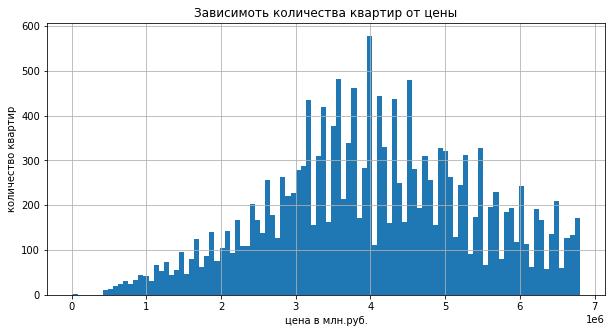

In [75]:
#Рассмотрим распределение цен от минимального значения до 3-го квартиля:
data = data.query('last_price <= 27000000')
plt.figure(figsize=(10,5))
plt.hist(data['last_price'], bins=100, range=(1.219000e+04,6.800000e+06))
plt.xlabel('цена в млн.руб.')
plt.ylabel('количество квартир')
plt.title('Зависимоть количества квартир от цены')
plt.grid()

Чаще всего встречаются квартиры с ценой от 3 до 5 млн.руб. Самое популярное объявления имеют цены порядка 3.9 млн руб.

In [76]:
#Есть анамальное значение 12190 руб:
data['last_price'].sort_values()

8793        12190
14911      430000
17456      430000
16274      440000
9581       450000
           ...   
17778    27000000
23446    27000000
9130     27000000
10474    27000000
2291     27000000
Name: last_price, Length: 22314, dtype: int64

In [77]:
data = data.drop(8793)

##### **Количество комнат:**

In [78]:
#Рассмотрим столбец rooms:
data['rooms'].describe()

count    22313.000000
mean         2.017344
std          0.978532
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

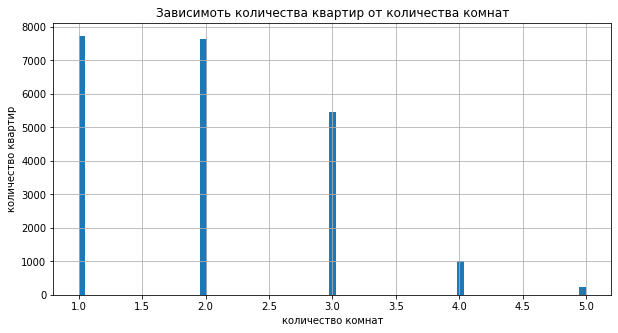

In [79]:
#Построим гистограмму в интервале от 1-ой до 5-и комнат:
data = data.query('7 > rooms > 0')
plt.figure(figsize=(10,5))
plt.hist(data['rooms'], bins=75, range=(1,5))
plt.xlabel('количество комнат')
plt.ylabel('количество квартир')
plt.title('Зависимоть количества квартир от количества комнат')
plt.grid()

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22112 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22112 non-null  int64         
 1   last_price            22112 non-null  int64         
 2   total_area            22112 non-null  float64       
 3   first_day_exposition  22112 non-null  datetime64[ns]
 4   rooms                 22112 non-null  int64         
 5   ceiling_height        22112 non-null  float64       
 6   floors_total          22112 non-null  int64         
 7   living_area           20331 non-null  float64       
 8   floor                 22112 non-null  int64         
 9   is_apartment          22112 non-null  bool          
 10  studio                22112 non-null  bool          
 11  open_plan             22112 non-null  bool          
 12  kitchen_area          20151 non-null  float64       
 13  balcony         

Большая часть объявлений это однокомнатные и двухкомнатные квартиры.

##### **Высота потолков:**

In [81]:
#В пункте предобработки данных уже был проведен анализ и изменены значения в определенных переменных столбца ceiling_height.
#Посмтрим общую информацию о нем:
data['ceiling_height'].describe()

count    22112.000000
mean         2.688221
std          0.221614
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

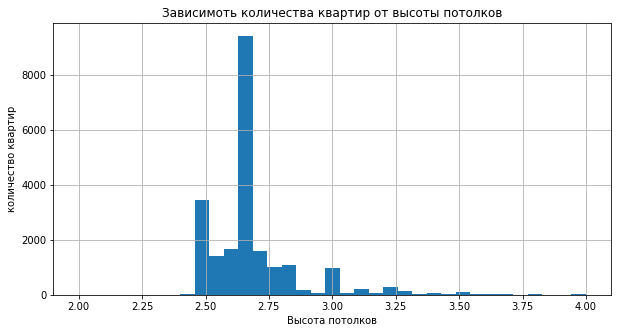

In [82]:
#Построим гистрограмму:
data = data.query('ceiling_height > 2')
plt.figure(figsize=(10,5))
plt.hist(data['ceiling_height'], bins=35, range=(2,4))
plt.xlabel('Высота потолков')
plt.ylabel('количество квартир')
plt.title('Зависимоть количества квартир от высоты потолков')
plt.grid()

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22095 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22095 non-null  int64         
 1   last_price            22095 non-null  int64         
 2   total_area            22095 non-null  float64       
 3   first_day_exposition  22095 non-null  datetime64[ns]
 4   rooms                 22095 non-null  int64         
 5   ceiling_height        22095 non-null  float64       
 6   floors_total          22095 non-null  int64         
 7   living_area           20316 non-null  float64       
 8   floor                 22095 non-null  int64         
 9   is_apartment          22095 non-null  bool          
 10  studio                22095 non-null  bool          
 11  open_plan             22095 non-null  bool          
 12  kitchen_area          20137 non-null  float64       
 13  balcony         

Средння высота потолков в объявлениях стремится к значению 2,6 м.

##### **Этаж, на котором расположена квартира:**

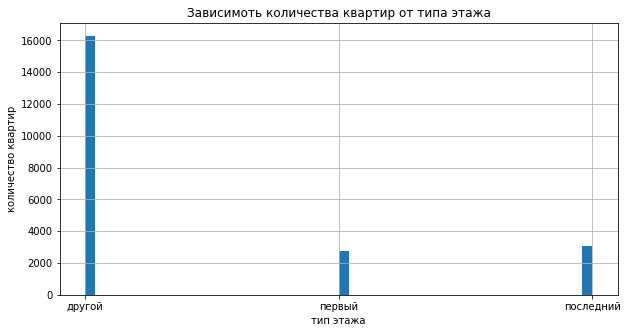

In [84]:
#Сразу построим гистограмму:
plt.figure(figsize=(10,5))
plt.hist(data['type_floor'], bins=50)
plt.xlabel('тип этажа')
plt.ylabel('количество квартир')
plt.title('Зависимоть количества квартир от типа этажа')
plt.grid()

In [85]:
data['floor'].sort_values()

11839     1
9830      1
9813      1
9805      1
9803      1
         ..
11079    29
1917     30
18629    31
11575    32
18218    33
Name: floor, Length: 22095, dtype: int64

Конечно же, количество первых и последних этажей проигрывает в общей выборке объявлений на продажу квартир.

##### **Общее количество этажей в доме:**

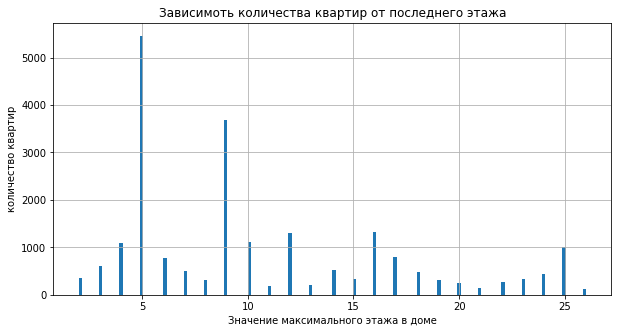

In [86]:
#Сразу построим гистограмму:
data = data.query('2 <= floors_total <= 26 or floors_total != floors_total')
plt.figure(figsize=(10,5))
plt.hist(data['floors_total'], bins=150)
plt.xlabel('Значение максимального этажа в доме')
plt.ylabel('количество квартир')
plt.title('Зависимоть количества квартир от последнего этажа')
plt.grid()

In [87]:
data['floors_total'].value_counts().head()

5     5455
9     3685
16    1313
12    1301
10    1108
Name: floors_total, dtype: int64

В Санкт-Петербурге и его округах в объявлениях преобладают дома с высотой 5 и 9 этажей.

##### **Расстояние до центра города в метрах:**

In [88]:
#Рассмотрим столбец city_centers_nearest:
data['city_сenters_nearest'].describe()

count    16747.000000
mean     14421.445632
std       8527.671768
min        208.000000
25%       9780.000000
50%      13235.000000
75%      16313.500000
max      65952.000000
Name: city_сenters_nearest, dtype: float64

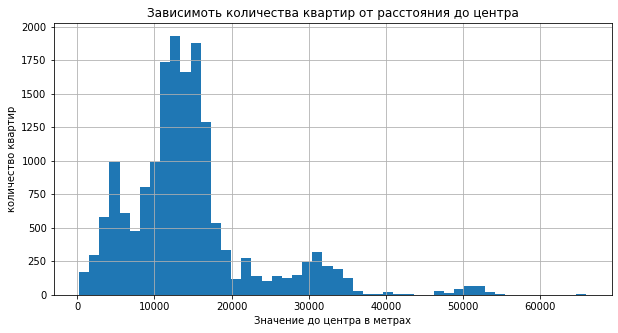

In [89]:
#Сразу построим гистограмму:
plt.figure(figsize=(10,5))
plt.hist(data['city_сenters_nearest'], bins=50)
plt.xlabel('Значение до центра в метрах')
plt.ylabel('количество квартир')
plt.title('Зависимоть количества квартир от расстояния до центра')
plt.grid()

В среднем удаленность от центра города составляет 10-20 км.

##### **Расстояние до ближайшего парка:**

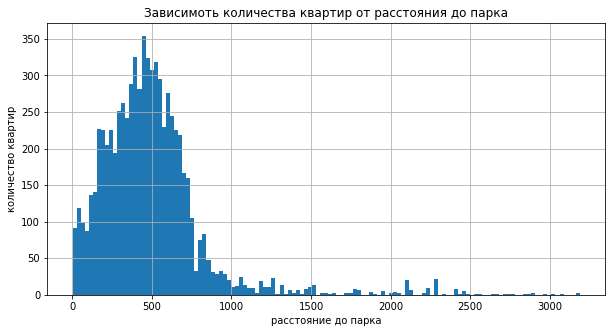

In [90]:
#Сразу построим гистограмму:
plt.figure(figsize=(10,5))
plt.hist(data['parks_nearest'], bins=125)
plt.xlabel('расстояние до парка')
plt.ylabel('количество квартир')
plt.title('Зависимоть количества квартир от расстояния до парка')
plt.grid()

Среднее расстояние до парка состовляет 350-600 м. для объявлений из выборки в которых нет пропусков.

##### check gap

In [91]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21866 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21866 non-null  int64         
 1   last_price            21866 non-null  int64         
 2   total_area            21866 non-null  float64       
 3   first_day_exposition  21866 non-null  datetime64[ns]
 4   rooms                 21866 non-null  int64         
 5   ceiling_height        21866 non-null  float64       
 6   floors_total          21866 non-null  int64         
 7   living_area           20102 non-null  float64       
 8   floor                 21866 non-null  int64         
 9   is_apartment          21866 non-null  bool          
 10  studio                21866 non-null  bool          
 11  open_plan             21866 non-null  bool          
 12  kitchen_area          19924 non-null  float64       
 13  balcony         

In [92]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'median', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,866.00","21,866.00","21,866.00","18,886.00","21,866.00","20,102.00","19,924.00","21,866.00","21,866.00"
min,1.00,20.10,2.25,1.00,"430,000.00",10.08,5.00,1.00,2.00
median,2.00,51.60,2.65,90.00,"4,600,000.00",30.00,9.00,4.00,9.00
max,6.00,240.00,10.00,731.00,"27,000,000.00",128.00,49.40,26.00,26.00


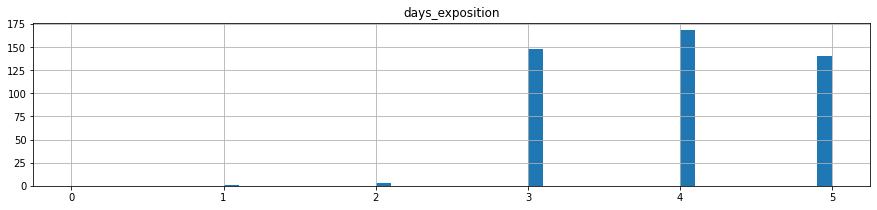

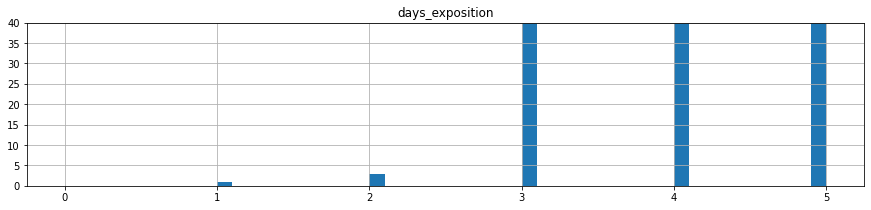

In [93]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [94]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [95]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


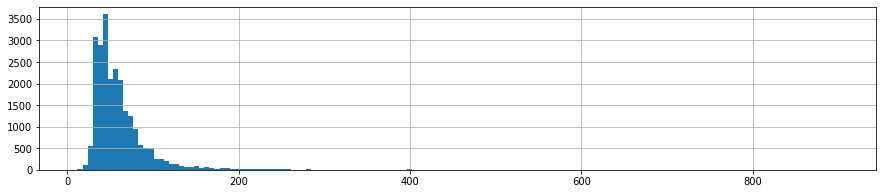

In [96]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

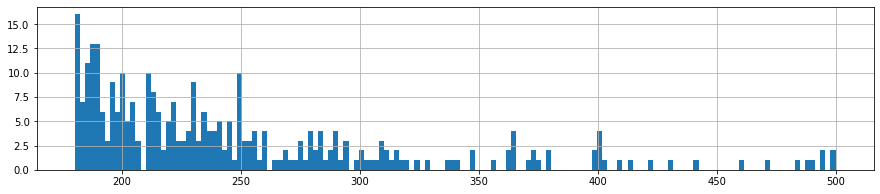

In [97]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

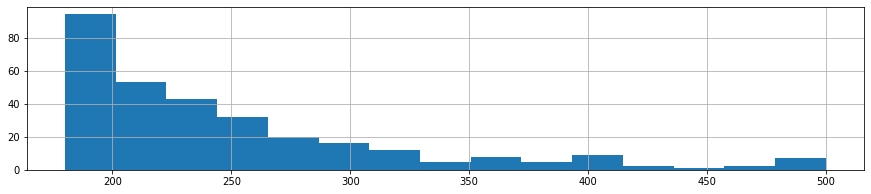

In [98]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

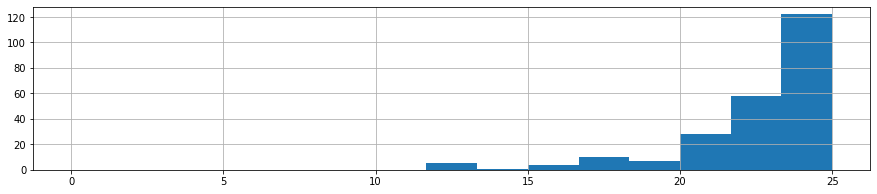

In [99]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [100]:
#21866 строк осталось. Изначально было 23699.
21866/23699

0.9226549643444871

<div class="alert alert-dang er">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Осталось выполнить пункт 4.1 (в старой версии п.2.4) из брифа проекта

В некоторых параметрах встречаются редкие и выбивающиеся значения. При построении гистограмм удалите их. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах, если они есть. Если природа аномалии понятна и данные действительно искажены, то восстановите    корректное значение. В противном случае удалите редкие и выбивающиеся значения. 
        
__Критичный уровень потерь записей на этапе предобработки составляет 10%, оптимальный 5%__
        
Если при фильтрации одной колонки, на этом проекте, теряем больше одного процента данных от изначального объема, стоит еще раз пересмотреть условия фильтрации        

In [101]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,1.00,22.05,2.40,3.00,"568,570.00",11.00,5.00,1.00,2.00
0.01,1.00,28.00,2.50,4.00,"1,000,000.00",13.50,5.00,1.00,2.00
0.5,2.00,51.60,2.65,90.00,"4,600,000.00",30.00,9.00,4.00,9.00
0.99,5.00,149.13,3.50,666.15,"20,900,000.00",90.00,30.00,22.00,25.00
0.9988,6.00,190.00,4.19,724.00,"26,028,759.40",118.49,42.82,25.00,26.00


#### **Быстрота продажи квартир**

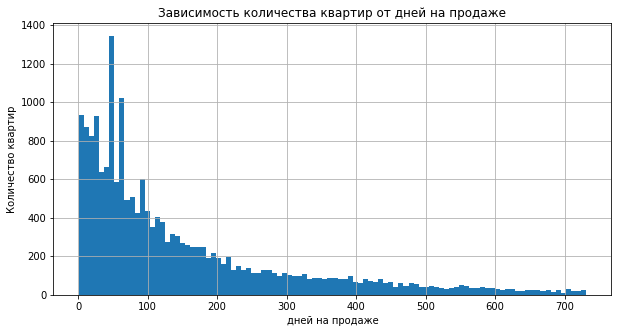

In [102]:
plt.figure(figsize=(10,5))
plt.hist(data['days_exposition'], bins=100)
plt.xlabel('дней на продаже')
plt.ylabel('Количество квартир')
plt.title('Зависимость количества квартир от дней на продаже')
plt.grid()

In [103]:
#Среднее значение состовляет 180, а медианое 95, что почти в 2 раза меньше, следовательно есть выбросы:
data['days_exposition'].describe()

count    18886.000000
mean       150.403738
std        155.699569
min          1.000000
25%         43.000000
50%         90.000000
75%        206.000000
max        731.000000
Name: days_exposition, dtype: float64

Медиана более хорошо работает с выбросами, поэтому среднее время, за которое продается квартира будем считать значением медианы, а имеено 95 дней (3 месяца). В первый квартиль входят квартиры, которые проданы за 45 дней, что достаточно быстро. В третий квартиль входят квартиры, которые продали 232 дня и больше, что достаточно долго.

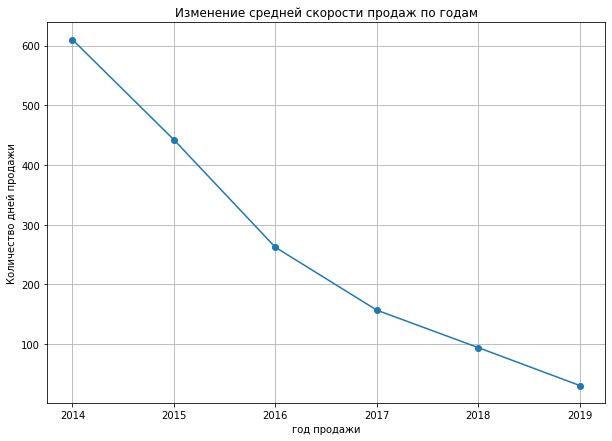

In [104]:
(
data
    .pivot_table(index='year_of_publication', values='days_exposition', aggfunc='mean')
    .plot(grid=True, style='o-', figsize=(10, 7), legend=False)
)
plt.title('Изменение средней скорости продаж по годам')
plt.xlabel('год продажи')
plt.ylabel('Количество дней продажи')
plt.show()

In [105]:
#Самое частое значение в столбце days_exposition это 45:
data['days_exposition'].mode()

0    45.0
dtype: float64

In [106]:
data['days_exposition'].value_counts()

45.0     848
60.0     524
7.0      219
30.0     196
90.0     183
        ... 
572.0      1
597.0      1
634.0      1
693.0      1
730.0      1
Name: days_exposition, Length: 722, dtype: int64

**Пики наблюдаются в 45 дней и 60 дней.** Постараемся объяснить эти экстремумы.

Политика Яндекс.недвижимости:

Бесплатное размещение объявлений для регионов России, кроме Москвы, Санкт-Петербурга и их областей:

- объект: квартира до 4,5 млн — 45 дней


- объект: квартира от 4,5 до 10 млн — 60 дней

- объект: квартира от 10 млн — 90 дней

для Санкт-Петербурга и его областей:

Бесплатное размещение объявлений:

 - Продажа квартир и комнат — 365 дней.

**Вывод:** пик в месте 45 дней обусловлен обновлением объявлений, в основном по гистограмме цен мы уже проследили, что наибольшая часть квартир в среднем стоит порядка 4 млн.руб. Это значение подходит под граничные условия (квартира до 4,5 млн - 45 дней - бесплатное объявление).

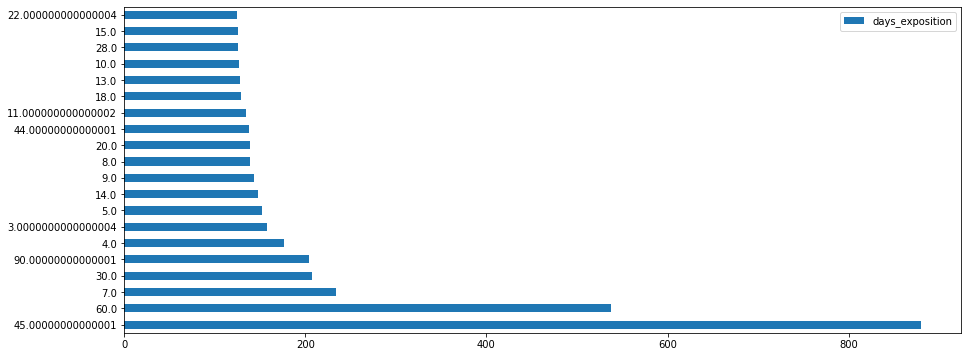

In [107]:
# check
# Моды на сырых данных
 
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

#### **Факторы, влияющие на стоимость недвижимости**

In [108]:
#Для наглядности построим корреляционную матрицу:
(
data
    .pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms','type_floor'])
    .corr()
    .style.format("{:,.2f}")
)

,kitchen_area,last_price,living_area,rooms,total_area
kitchen_area,1.00,0.41,-0.71,-0.90,-0.20
last_price,0.41,1.00,-0.31,-0.29,0.54
living_area,-0.71,-0.31,1.00,0.89,0.56
rooms,-0.90,-0.29,0.89,1.00,0.52
total_area,-0.20,0.54,0.56,0.52,1.00


Из корреляионной матрицы прослеживается зависимости между ценой и общей площадью (коэф.корреляции составляет 0.54)

**Построим диаграммы рассеяния для всех значений:**

**График корреляции для всех значений общей площади:**

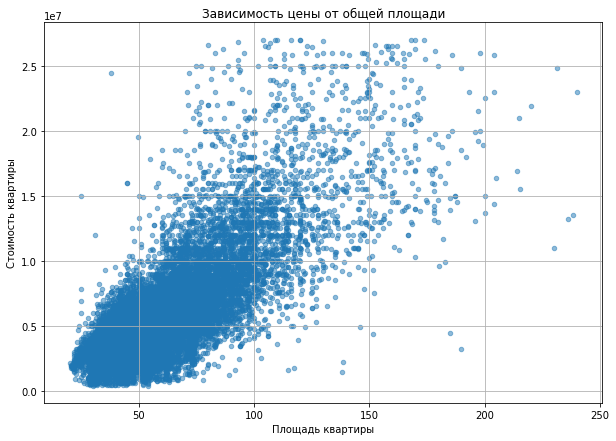

In [109]:
data.plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(10,7), alpha=0.5)
plt.title('Зависимость цены от общей площади')
plt.xlabel('Площадь квартиры')
plt.ylabel('Стоимость квартиры')
plt.show()

**График корреляции для всех значений жилой площади:**

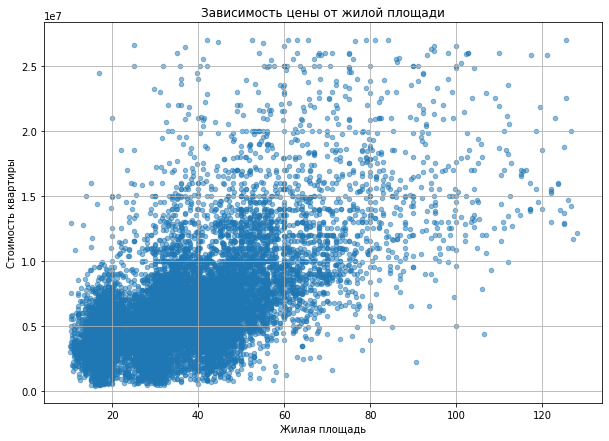

In [110]:
data.plot(x='living_area', y='last_price', kind='scatter', grid=True, figsize=(10,7), alpha = 0.5)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость квартиры')
plt.show()
#Из данного графика мало что понятно.

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />  Можно попробовать настроить вид точечных графиков      
    
[Как сделать диаграмму рассеяния из фрейма данных Pandas](https://www.codecamp.ru/blog/pandas-scatter-plot/?ysclid=lh0tbpkoa9628147030)
    
Примеры расчета коэф. корреляции и не только
        
[Исследуем отношение между переменными](https://dfedorov.spb.ru/pandas/downey/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D0%B5%D0%BC%20%D0%BE%D1%82%D0%BD%D0%BE%D1%88%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.html?ysclid=l9ev0utyg728177057)

**Графики корреляции для средних значений (Кухонной зона):**

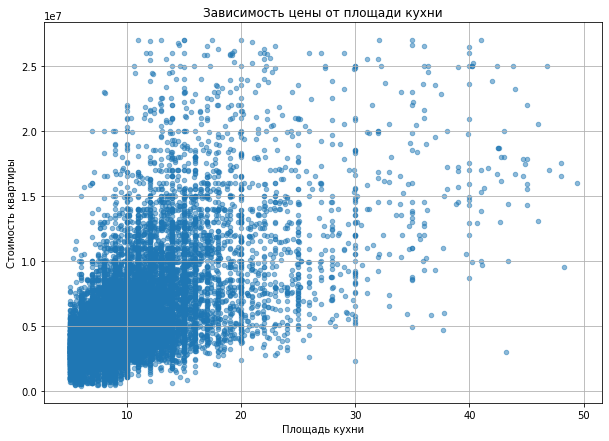

In [111]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, figsize=(10,7), alpha=0.5)
#(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(7, 7))
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Стоимость квартиры')
plt.show()

**Графики зависимости цены от числа комнат:**

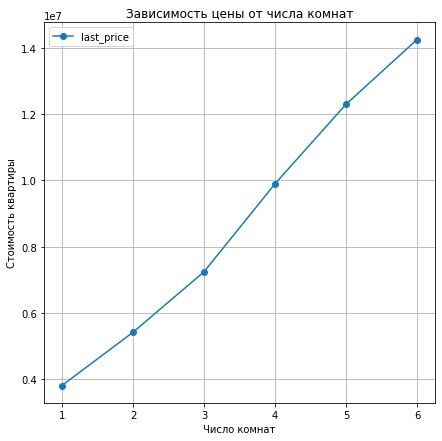

In [112]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(7, 7))
plt.title('Зависимость цены от числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Стоимость квартиры')
plt.show()

**Графики зависимости цены от типа этажа:**

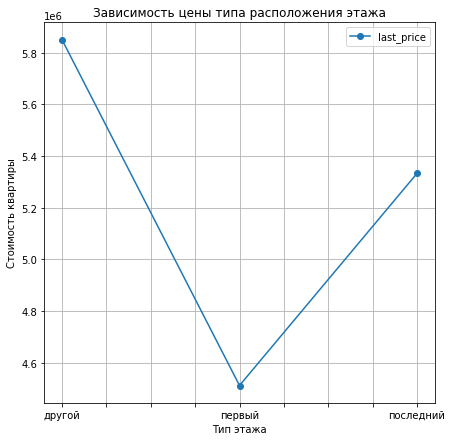

In [113]:
data.pivot_table(index='type_floor', values='last_price').plot(grid=True, style='o-', figsize=(7, 7))
plt.title('Зависимость цены типа расположения этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Стоимость квартиры')
plt.show()

**График зависимости цены от дня публикации:**

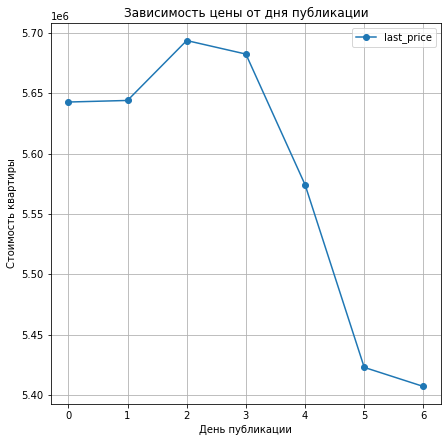

In [114]:
data.pivot_table(index='day_of_publication', values='last_price').plot(grid=True, style='o-', figsize=(7, 7))
plt.title('Зависимость цены от дня публикации')
plt.xlabel('День публикации')
plt.ylabel('Стоимость квартиры')
plt.show()

**График зависимости цены от месяца публикации:**

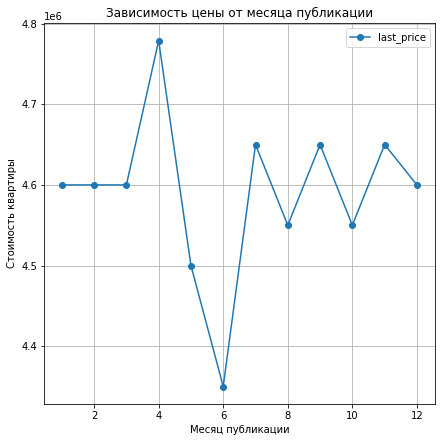

In [115]:
(
data
    .pivot_table(index='month_of_publication', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(7, 7))
)
plt.title('Зависимость цены от месяца публикации')
plt.xlabel('Месяц публикации')
plt.ylabel('Стоимость квартиры')
plt.show()

**График зависимости цены квартиры от года публикации:**

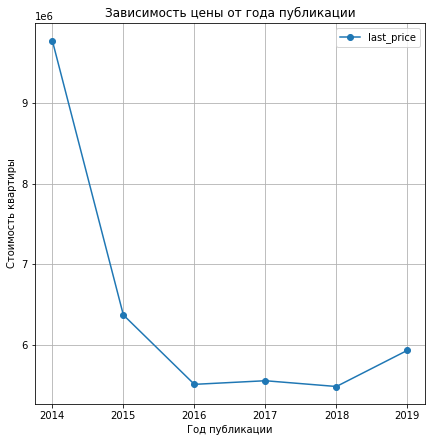

In [116]:
data.pivot_table(index='year_of_publication', values='last_price').plot(grid=True, style='o-', figsize=(7, 7))
plt.title('Зависимость цены от года публикации')
plt.xlabel('Год публикации')
plt.ylabel('Стоимость квартиры')
plt.show()

In [117]:
data.groupby('year_of_publication')['total_area'].mean()

year_of_publication
2014    86.161404
2015    64.396917
2016    58.288949
2017    57.731120
2018    56.244229
2019    56.578533
Name: total_area, dtype: float64

C 2014 по 2019 год наблюдается спад средней площади недвижимости выставляемой на продажу. Люди чаще стали выставлять на продажу жилье с меньшей площадью относительно 2014 года. В связи с этим график цен недвижимости имеет спад.

In [118]:
data.groupby('year_of_publication')['day_of_publication'].count()

year_of_publication
2014      57
2015     746
2016    2416
2017    7741
2018    8153
2019    2753
Name: day_of_publication, dtype: int64

Количество объявлений за 2014 год всего 57. Зато пик выставленных объявлений в 2017-2018 году 7741 и 8153 соответсвенно, что очень много относительно других лет. 

**Вывод: Средняя площадь квартир, выставленных на продажу, с годами - падает. Количество объявлений растет. Прослеживается тенденция увеличения количетсва жилья и снижения цен. Это может быть связано с обильным строительством новых ЖК, в приоритете у которых идет небольшая общая площадь и большое количетсво квартир.**

#### **Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [119]:
#10 населенных пунктов с наибольшим числом объявлений:
data['locality_name'].value_counts().sort_values(ascending=False).head(10)

санкт-петербург    14460
мурино               464
кудрово              430
шушары               421
всеволожск           378
пушкин               343
колпино              331
гатчина              288
парголово            257
выборг               225
Name: locality_name, dtype: int64

In [120]:
mean_price_sq = data.pivot_table(index='locality_name', values='last_price', aggfunc='count')
mean_price_sq.columns = ['count']
mean_price_sq = mean_price_sq.sort_values(by='count', ascending=False).head(10)
mean_price_sq['square_price'] = data.pivot_table(index='locality_name', values='square_price').round(2)
mean_price_sq.sort_values(by='square_price', ascending=False)

,count,square_price
locality_name,,
санкт-петербург,14460,109801.41
пушкин,343,102432.50
кудрово,430,95350.57
парголово,257,89025.84
мурино,464,85405.20
шушары,421,78252.34
колпино,331,75262.53
гатчина,288,68961.47
всеволожск,378,68836.43


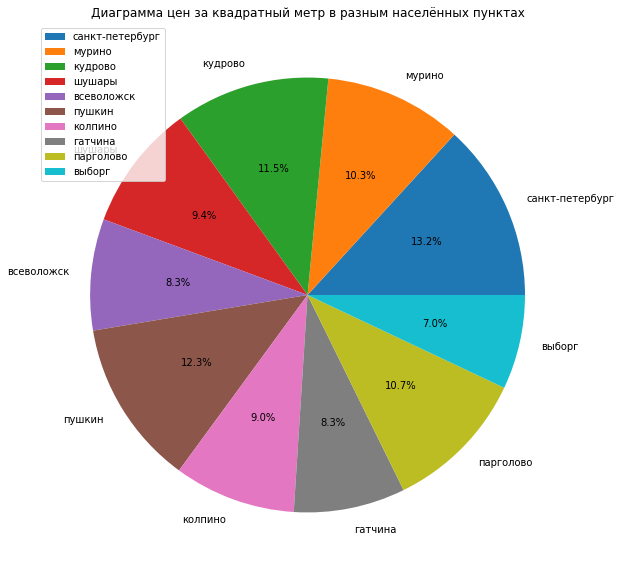

In [121]:
mean_price_sq.plot(y='square_price', kind='pie', figsize=(10,10), autopct='%1.1f%%')
plt.title('Диаграмма цен за квадратный метр в разным населённых пунктах')
plt.ylabel('')
plt.show()

Из круговой диаграммы видно, что в процентном соотношении цены за квадратный метр в Санкт-Петербурге самые большие, но такая диаграмма мало о чем нам говорт, для сравнения лучше построить горизонтальную гисторграмму по значениям количества объявлений и цен за кв.м.:

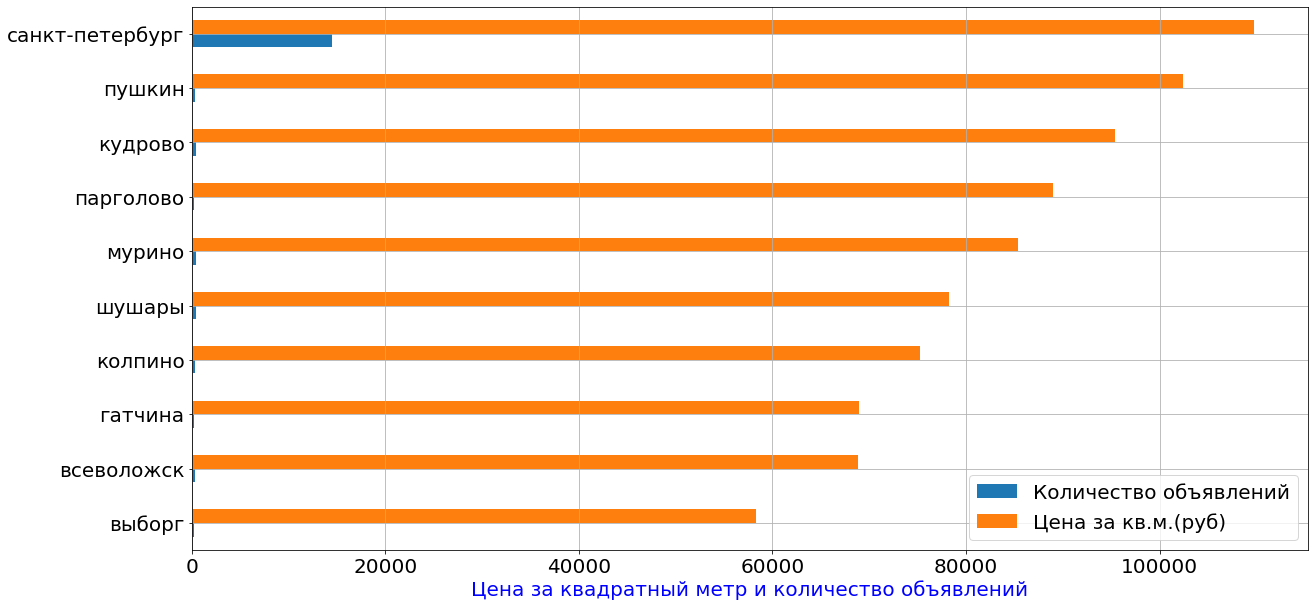

In [122]:
(
mean_price_sq
    .sort_values(by='square_price', ascending=True)
    .plot(kind = 'barh', figsize = (20,10), fontsize=20, grid=True)
    .set_xlabel('Цена за квадратный метр и количество объявлений', fontsize=20, color='Blue')
)
plt.legend(['Количество объявлений','Цена за кв.м.(руб)'], prop={'size': 20})
plt.ylabel('')
plt.show()

**Вывод: Самая высокая цена за квадратный метр в Санкт-Петербурге, самая низкая в Выборге - для 10 самых популярных объявлений. Также можно оценить количество объявлений в различных населённых пунктах. В Санкт-Петербурге их больше всего.**

#### **Средняя стоимость на разном удалении от центра**

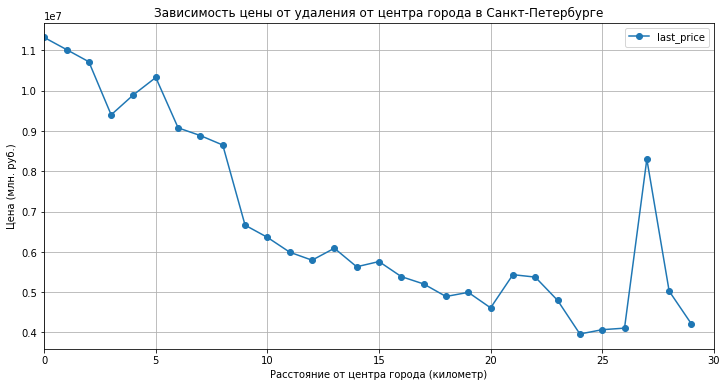

In [123]:
(
data
    .query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_km', values='last_price')
#     .plot(grid=True, style='o-', xlim=(0,20), figsize=(10, 6))
# я изменил твой код, увеличил промежуток    
    .plot(grid=True, style='o-', xlim=(0,30), figsize=(12, 6))
)
plt.title('Зависимость цены от удаления от центра города в Санкт-Петербурге')
plt.xlabel('Расстояние от центра города (километр)')
plt.ylabel('Цена (млн. руб.)')
plt.show()

**Вывод: С удалением от центра стоимость квартир падает. В центре цены на квартиры порядка 31 млн.руб. Цена на недвижимость в большей степени от общей площади. Удалясь от центра на 10 км. цены на недвижимость выравниваются и уже не зависят от расстояния.**

In [124]:
#Проанализируем значения в таблице на 27-ом километре:
data.query('distance_km == 27').sort_values(by='last_price', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,day_of_publication,month_of_publication,year_of_publication,type_floor,distance_km
18386,15,24800000,190.0,2014-12-10,4,2.62,4,104.1,3,False,False,False,30.0,0,пушкин,15072.0,27226.0,1,114.0,0.0,NaN,NaN,130526.32,2,12,2014,другой,27.0
140,8,16912000,105.7,2016-12-09,2,2.70,3,48.4,1,False,False,False,15.4,0,пушкин,14352.0,26506.0,3,366.0,3.0,179.0,390.0,160000.00,4,12,2016,первый,27.0
7996,17,16600000,106.0,2017-12-02,4,3.20,3,50.0,3,False,False,False,30.0,0,пушкин,14822.0,26976.0,1,254.0,0.0,NaN,NaN,156603.77,5,12,2017,последний,27.0
15578,20,16000000,101.9,2018-01-08,2,2.87,4,48.1,1,False,False,False,26.9,0,пушкин,15201.0,27355.0,2,273.0,3.0,368.0,NaN,157016.68,0,1,2018,первый,27.0
12466,11,15000000,89.6,2017-01-31,3,2.65,3,57.0,3,False,False,False,13.5,0,пушкин,15065.0,27218.0,3,317.0,3.0,509.0,357.0,167410.71,1,1,2017,последний,27.0
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,False,False,25.0,0,санкт-петербург,23888.0,27313.0,1,1496.0,0.0,NaN,128.0,193918.92,1,11,2017,другой,27.0
4400,4,12300000,78.6,2017-09-09,3,2.65,5,48.0,1,False,False,False,11.0,0,пушкин,14567.0,26720.0,2,403.0,0.0,NaN,4.0,156488.55,5,9,2017,первый,27.0
2948,23,11350000,75.0,2017-08-15,3,3.50,2,52.7,2,False,False,False,8.7,4,пушкин,15337.0,27490.0,3,216.0,3.0,153.0,207.0,151333.33,1,8,2017,последний,27.0
22037,15,10900000,145.0,2017-04-17,2,3.50,2,39.0,2,False,False,False,10.0,0,пушкин,15337.0,27490.0,3,216.0,3.0,153.0,188.0,75172.41,0,4,2017,последний,27.0
2776,8,10500000,105.0,2017-12-06,4,3.12,3,76.3,1,False,False,False,6.3,0,пушкин,14880.0,27034.0,1,169.0,0.0,NaN,NaN,100000.00,2,12,2017,первый,27.0


**На расстоянии 27 км от центра Санкт-Петербурга находится крупный туристический, научный, учебный и военно-промышленный центр Пушкин. Это престижный район, поэтому цена на удалении от центра не падает, а имеет аномальное значение.**

In [125]:
#Количество объявлений на 3-ем км.:
data[data['distance_km'] == 3]['type_floor'].count()

310

In [126]:
#Количество объявлений на 5-ом км.:
data[data['distance_km'] == 5]['type_floor'].count()

748

In [127]:
#Делаем срезы и сохраняем в переменные:
s3 = data.query('distance_km == 3')

In [128]:
s5 = data.query('distance_km == 5')

In [129]:
#Группируем значения по типу этажа:
s3.groupby('type_floor')['last_price'].count()

type_floor
другой       190
первый        52
последний     68
Name: last_price, dtype: int64

In [130]:
s5.groupby('type_floor')['last_price'].count()

type_floor
другой       560
первый        72
последний    116
Name: last_price, dtype: int64

**Доля квартир от общего количество объявлений на удаленности 3 км:**

In [131]:
s3.groupby('type_floor')['last_price'].count() / data[data['distance_km'] == 3]['type_floor'].count()

type_floor
другой       0.612903
первый       0.167742
последний    0.219355
Name: last_price, dtype: float64

**Доля квартир от общего количество объявлений на удаленности 5 км:**

In [132]:
s5.groupby('type_floor')['last_price'].count() / data[data['distance_km'] == 5]['type_floor'].count()

type_floor
другой       0.748663
первый       0.096257
последний    0.155080
Name: last_price, dtype: float64

**Вывод: общее количество объявлений на 5-ом километре больше, чем на 3 почти в 2.5 раза. Квартиры на первом и последних этажах составляют достаточно большую часть объявлений порядка 38% на удалении 3 км. Это же значение для удаленности в 5 км составляет 25%. Львинную долю объявлений получают все остальные "другие" этажи. Для удаленности в 3 и 5 км эти значения 62% и 75%. По мере удаления от центра количество объявлений растет. На промежутке с 3 до 5 километров идет резкий рост количества объявлений.** 

### Напишите общий вывод

#### Общая информации о данных.

На данном этапе был получен массив из 24 тысяч строк, имеющий пропуски в данных. Визуализировав числовые данные в виде гистограмм сразу стало заметно, что в них имеются выбросы.

#### Выполнена предобработка данных.

**1. В начале мы определили количество пропусков в отдельных столбцах таблицы.**

**2. Устранили пропуски в столбцах таблицы там, где это возможно было сделать.**

**3. Рассмотрели значения в столбцах и привели их к нужным типам данных.**

**4. Сделали выводы о причинах появления пропусков.**

Основные причины появления пропусков:

- Человеческий фактор

- Отсутсвие полей с обязательным вводом

- Экспорт/Импорт данных в различное ПО

#### Добавление новых данных, для нахождения закономерностей.

Для проведения исследовательского анализа нам потребовалось расширить наш датафрейм. Были добавлены следующие столбцы:

- **square_price** - цена за квадратный метр

- **day_of_publication** - день публикации объявления (0 - понедельник, 1 - вторник и т.д.)

- **month_of_publication** - месяц публикации

- **year_of_publication** - год публикациии

- **type_floor** - тип этажа ("первый", "последний" и "другой")

- **distance_km** - дистанция до центра города в км.

Значения переменных в новых столбцах были полученны из исходных данных.

#### Проведение исследовательского анализа данных.

- **Анализ параметров**

В результате анализа данных можно сказать, что стандартное предложение рынка объявлений это недвижимость с параметрами: общая площадь 52 кв.м., жилая площадь 30 кв.м, площадь кухни 9 кв.м., средняя цена 4.6 млн.руб., количество комнат 2, высота потолков 2.65 м., расстояние до центра 10 км, расстояние до парка 350-600 м..

- **Проведен анализ как быстро продавалась недвижимость**

Наибольшее количество объявлений скорости продажи попали в пики 45 и 60 дней. Это связано с данными сервиса яндекс.недвижимости, которое облагает своих пользователей определенными правилами выставления объявлений.

**1. Среднее время продажи квартиры состовляет порядка 95 дней (медианое значение).**

**2. Быстрой продажей можно считать значения, которые вошли в первый квартиль - 45 дней.**

**3. Долгой продажей считаем значения, которые вошли в третий квартиль - 232 дня и более.**

- **Изучены факторы, влияющие на стоимость квартиры**

На данном этапе была построенна корреляционная матрица, которая показала взаимосвязь табличных значений с ценой. Наивысшие показатель получился у параметра "общая площадь" (0.54).

Также были построенны диаграммы рассеяния для этих параметров. Из этих данных можно получить закономерность: чем больше общая площадь, тем выше цена недвижимости, что логично, эти величины коррелируют между собой.

- **Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

Самая большая стоимость за квадратный метр (109 тыс.руб.) получилась в Санкт-Петербурге. Второе место занимает Пушкин (102 тыс.руб.)- это крупный туристический центр, который имеет большое количетсво усадеб и парков. Последующием места находятся в округах Санкт-Петербурга - являюся его смежными районами. Самая низкая цена за кв.м. оказалась в Выборге (58 тыс.руб.), которая находится на расстоянии 122 км от Петербурга.

- **Выявлена зависимость изменения цены на недвижимость на разном расстоянии от центра**

Самые дорогие квартиры находятся в центре Санкт-Петербурга. По мере удаления от центра - цена падает. На расстоянии в 10 км цена стабилизируется и почти не изменяется с увеличением дальности. В районе с 3 до 5 км происходит спад и подъем цен на недвижимость - это связано с этажностью домов и количеством объявлений. Также имеется скачок в районе 27-го километра удаленности от центра, там находится Пушкин - один из престижных районов Петербурга.

In [138]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

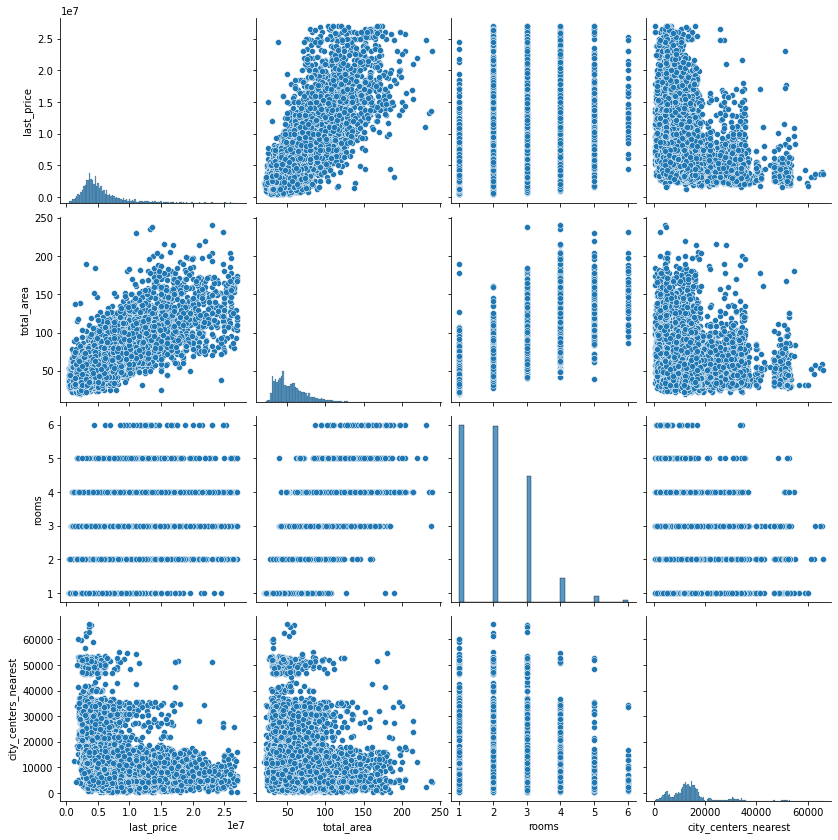

In [134]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'city_сenters_nearest']])
plt.gcf().set_size_inches(12,12);


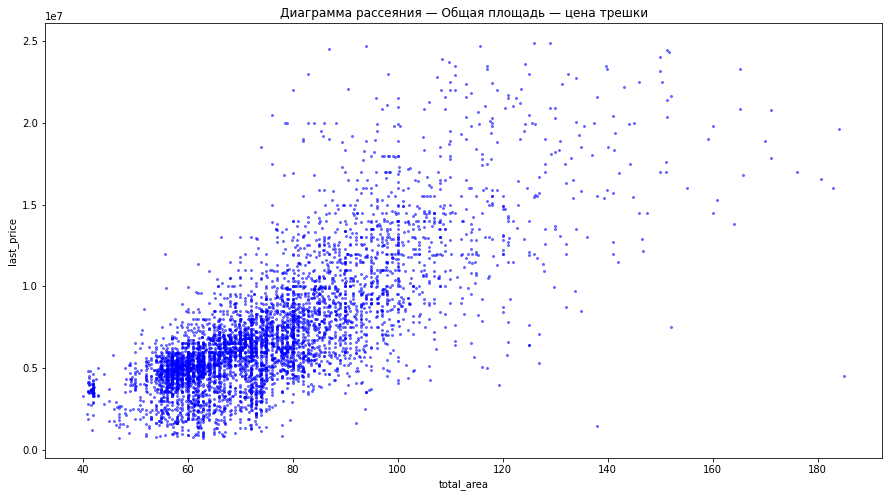

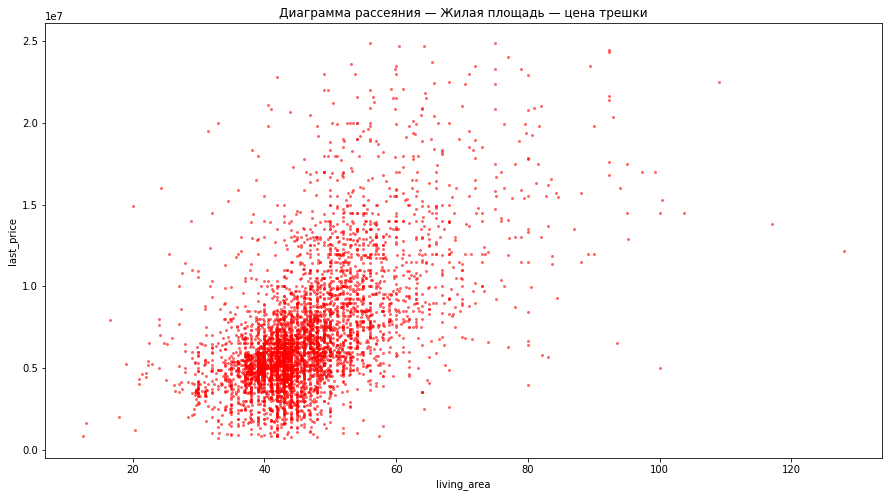

In [135]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

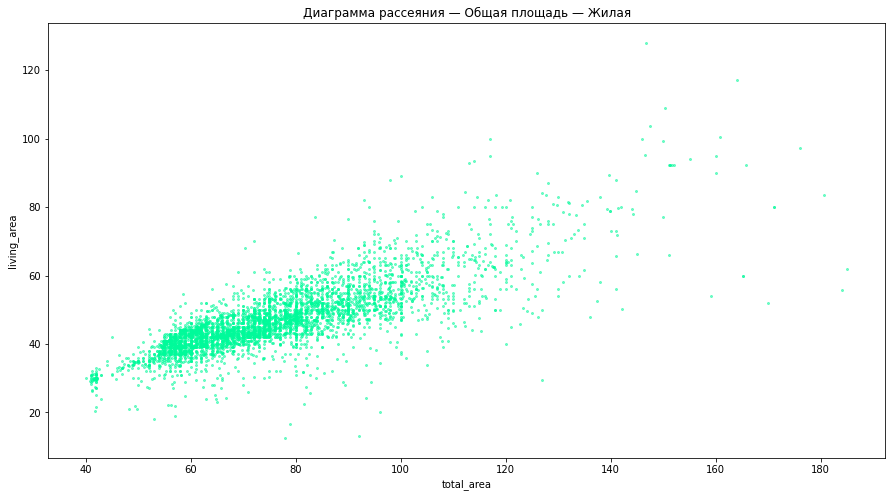

In [136]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'MediumSpringGreen', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.